In [1]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 16D9-A643

 Directory of C:\Users\dsilva2\AOC-Twitch

10/21/2021  11:27 AM    <DIR>          .
10/21/2021  11:27 AM    <DIR>          ..
09/22/2021  08:34 AM    <DIR>          .ipynb_checkpoints
09/22/2021  08:30 AM       121,985,825 [10-20-20] AOC - .json
10/21/2021  11:27 AM           421,222 AOC-Twitch-analysis.ipynb
               2 File(s)    122,407,047 bytes
               3 Dir(s)  268,770,590,720 bytes free


In [2]:
import json
import pandas as pd

In [3]:
with open('[10-20-20] AOC - .json', encoding = 'utf-8') as a:
    chat_raw = json.load(a)

In [ ]:
chat_raw

In [5]:
chat_raw.keys()

dict_keys(['streamer', 'comments', 'video', 'emotes'])

In [6]:
chat_raw['streamer']

{'name': 'AOC', 'id': 502865545}

In [7]:
chat_raw['video']

{'start': 0.0, 'end': 12660.0}

In [8]:
chat_raw['emotes'].keys()

dict_keys(['thirdParty', 'firstParty'])

In [9]:
chat_raw['emotes']['thirdParty'][0]

{'id': '54fa8f1401e468494b85b537',
 'imageScale': 2,
 'data': 'iVBORw0KGgoAAAANSUhEUgAAADgAAAA4CAQAAAACj/OVAAAACXBIWXMAAAsTAAALEwEAmpwYAAABCmlDQ1BQaG90b3Nob3AgSUNDIHByb2ZpbGUAAHjardA9SgNBAMXx/0TURtQiWE+phQvGasvNh4tgms0W2XSb2SFZkt0dZsaY3MFDeASP4A1SCF5EsLYIEiwFf9XjNQ8eiNeo3x20zqGqvY2TKBtnE3m85YgDAMiVM8PRXQpQN7XmNwFfHwiA9+uo3x3wN4fKWA+8AQ+FdgrECVA+eeNBrIH2dGE8iGegvUiTHogX4NTrtQfoNWZjy9ncy0t1JW/CMJRR0Uy1HG2c15WT97VqrGls7nURyGi5lEk5m3snE+20XekiYLcNwFls842M86rKZSfo8O/G2UTu0meKAMTFdt/tqUe7+vm5dQvfvwZAKuJ5dkAAAAAgY0hSTQAAeiUAAICDAAD5/wAAgOkAAHUwAADqYAAAOpgAABdvkl/FRgAAC5dJREFUeNrs2Gt0leWVB/DfueRCQi7UkHBJ5CL3+1WoFbRWBNG2WG+lWq3Y2tZiXdbOWk5nrLaVdtV66ShTlbEWW0FtDaKlggoIFUUBEUVAsAgBQoBAQEIScjnnmQ85HBOKM+OsWfOp+/1ynv3uZ//33mc/+332jgT/vxT1D8B/AH5Kij99ChsqrdU1o3pCS+eM5h15751dWxJNRsRFJSUErZkdiyST3dcNfr+o+d3N24+EyBnNlxzpZa4+VuoqTz0KlYgJzhJN7YqfyopMDUWrbnJ5acemREHm9G5dkS2izlENyBAXke+4DyZFqquT9RUl+xPRj+pWbfyg5uje2o2JfVExEac6cqcAzLJrxDuPTh99g66IpaL+nl3IEBETlZDQLNeFuTm52Q71DuKqvWW9ykRkR9hR8V7W24Vv57739/9YZ

These thirdParty emotes have a `name` key which could be passed to something like [twitchquotes.com](https://www.twitchquotes.com/emoticons/) in the format `/custom-:tf:` or `twitch-:(` for example. I'm not sure what determined if it's a custom or twitch emote.

In [10]:
chat_raw['emotes']['firstParty'][0]

{'id': '302819242',
 'imageScale': 1,
 'data': 'iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAYAAAByDd+UAAAABHNCSVQICAgIfAhkiAAACNpJREFUSIl9lluM3VUZxde39/7fzv2cmTOXdjqdKbVAmwKlNUJbSCHIJbbEkMyoMRoIpJFqjAIB3zxYHzRBiBIg8ECMEWNmFHlCBLSTUhLKRaS00wnTdjqU6VxOZ879f9v/vbcPpVwKYT1+D7+115d8O4twsSoVhkpFf360J0WFE78uefwuR7GcR4Io1GTaMtKN5B0TikM1P376589On3p771Zr2zPvyC9wPxZ9HlxhlUpFj42N8H81c3tUe/6WFA/bBdbZkWXRtTnXAkUxHGUgYgNHWZArPkTM4DJvptGI77zz6fcPmo+5BJiLDdnFZjft33f536Ohw4nj/sMudP2Iu94DMYlr4Wa04RYsx4bludCMoVqrIzJaM5cnjJlhE4f/eW7v1XthDAgwlcqn/AviF8yObdxI62/d1t8hHGSCXxb67cSoRDuCaYdrdOdTLA58NOtNVOcW0FyuA1Kj1fSp3QyZSbS2iLEUt/Ycef6pK3OpwouP/mk5JgKbmPg0qQCACYBNjI4mu/6w/75A8gFZC+K1vWU7qM/BBCGcjMDCcgcUhFjtWti88wrks2mwjkR1dgWLszWIhDG/IY0RJhExvr29l14hwg4AygB0Yb00MjbGx0dH1Z4nn7wmsfnLkfJTrcYCc1lAeTdEhlpI6RZ0cwFfX53GHTduRmFVEdwk4GEC04wg55ponVnBm2/NoFFPEKwEkiSz4pj/0S2vvnd2aCL+ZQWGAMNHN23iK2vWeNLtmfBj1dNsN5EkMQNpWDCIIx/NlWUMF1zcdt1mZNaWIbUEpIRWGkQExhiyjosM45iaPgshbO5YXMpOvLVdr2d+8Wz9pU0j4OOTMHxiYkL37Ry9I5B0d63ZSgwlvNRdgFISOolR

May need to use the [Twitch emote API](https://dev.twitch.tv/docs/api/reference#get-global-emotes) to figure out what these emotes are. <br>
Or, can decode the `data` key to an image, but have not yet tested.

In [11]:
chat_raw['comments'][0].keys()

dict_keys(['_id', 'created_at', 'updated_at', 'channel_id', 'content_type', 'content_id', 'content_offset_seconds', 'commenter', 'source', 'state', 'message', 'more_replies'])

In [12]:
len(chat_raw['comments'])

110821

In [13]:
chat_raw['comments'][0]

{'_id': 'd9d97398-54d1-42c4-8e93-67ea4ba4a038',
 'created_at': '2020-10-21T00:33:27.758Z',
 'updated_at': '2020-10-21T00:33:27.758Z',
 'channel_id': '502865545',
 'content_type': 'video',
 'content_id': '776770697',
 'content_offset_seconds': 6.058,
 'commenter': {'display_name': 'Mang0king',
  '_id': '61584527',
  'name': 'mang0king',
  'type': 'user',
  'bio': None,
  'created_at': '2014-04-25T15:14:37.010777Z',
  'updated_at': '2021-01-29T02:25:14.486051Z',
  'logo': 'https://static-cdn.jtvnw.net/user-default-pictures-uv/41780b5a-def8-11e9-94d9-784f43822e80-profile_image-300x300.png'},
 'source': 'chat',
 'state': 'published',
 'message': {'body': 'zyoriPride zyoriPride zyoriPride zyoriPride',
  'bits_spent': 0,
  'fragments': [{'text': 'zyoriPride',
    'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}},
   {'text': ' ', 'emoticon': None},
   {'text': 'zyoriPride',
    'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}},
   {'text': ' ', 'emoticon': None}

Important data for research questions are probably,`_id`, `created_at`, `commenter` (but not all the keys), `state`, `message` (probably all keys), and unsure if `emoticons` is going to give anything different from the message fragments.

Going to start by pulling each comment into a row of a DataFrame. Then will break out the commenter elements that are intersting. Will leave message cohesive for the moment.

In [14]:
comments_df = pd.DataFrame(chat_raw['comments'])

In [15]:
comments_df.head()

,_id,created_at,updated_at,channel_id,content_type,content_id,content_offset_seconds,commenter,source,state,message,more_replies
0,d9d97398-54d1-42c4-8e93-67ea4ba4a038,2020-10-21T00:33:27.758Z,2020-10-21T00:33:27.758Z,502865545,video,776770697,6.058,"{'display_name': 'Mang0king', '_id': '61584527...",chat,published,{'body': 'zyoriPride zyoriPride zyoriPride zyo...,False
1,3d8f5875-1d7f-405d-bad2-61df6ec6199e,2020-10-21T00:33:27.944Z,2020-10-21T00:33:27.944Z,502865545,video,776770697,6.244,"{'display_name': 'BubbRubb4Real', '_id': '2058...",chat,published,{'body': 'shotoHood shotoHood shotoHood shotoH...,False
2,87d2d34e-8cc0-4529-87a9-9a59b12c48ef,2020-10-21T00:33:27.949Z,2020-10-21T00:33:27.949Z,502865545,video,776770697,6.249,"{'display_name': 'EvanNumber7', '_id': '445507...",chat,published,"{'body': 'xqcCheeto ORANGE SUS OMEGALUL', 'bit...",False
3,0c516b16-eb07-4390-907c-931fd537633b,2020-10-21T00:33:29.258Z,2020-10-21T00:33:29.258Z,502865545,video,776770697,7.558,"{'display_name': 'via_asf', '_id': '552271934'...",chat,published,{'body': 'does anyone know who she’s playing w...,False
4,c02a123d-ee0f-4bf3-b31e-13757ebcabcc,2020-10-21T00:33:29.296Z,2020-10-21T00:33:29.296Z,502865545,video,776770697,7.596,"{'display_name': 'alkappa_foundation', '_id': ...",chat,published,"{'body': 'Kappa 👉 pokiW', 'bits_spent': 0, 'fr...",False


In [16]:
len(comments_df.index)

110821

In [17]:
comments_df['created_at'].loc[0]

'2020-10-21T00:33:27.758Z'

All times appear to be Zulu, so need to decide what timezone we want to discuss/report in.

In [18]:
type(comments_df['created_at'].loc[0])

str

In [19]:
from datetime import datetime as dt

In [20]:
dt.strptime(comments_df['created_at'].loc[0], '%Y-%m-%dT%H:%M:%S.%fZ')

datetime.datetime(2020, 10, 21, 0, 33, 27, 758000)

In [21]:
from dateutil.parser import parse

In [22]:
parse(comments_df['created_at'].loc[0])

datetime.datetime(2020, 10, 21, 0, 33, 27, 758000, tzinfo=tzutc())

In [23]:
comments_df['created_at_dt'] = [parse(x) for x in comments_df['created_at']]
comments_df['updated_at_dt'] = [parse(x) for x in comments_df['updated_at']]

In [24]:
comments_df.head()

,_id,created_at,updated_at,channel_id,content_type,content_id,content_offset_seconds,commenter,source,state,message,more_replies,created_at_dt,updated_at_dt
0,d9d97398-54d1-42c4-8e93-67ea4ba4a038,2020-10-21T00:33:27.758Z,2020-10-21T00:33:27.758Z,502865545,video,776770697,6.058,"{'display_name': 'Mang0king', '_id': '61584527...",chat,published,{'body': 'zyoriPride zyoriPride zyoriPride zyo...,False,2020-10-21 00:33:27.758000+00:00,2020-10-21 00:33:27.758000+00:00
1,3d8f5875-1d7f-405d-bad2-61df6ec6199e,2020-10-21T00:33:27.944Z,2020-10-21T00:33:27.944Z,502865545,video,776770697,6.244,"{'display_name': 'BubbRubb4Real', '_id': '2058...",chat,published,{'body': 'shotoHood shotoHood shotoHood shotoH...,False,2020-10-21 00:33:27.944000+00:00,2020-10-21 00:33:27.944000+00:00
2,87d2d34e-8cc0-4529-87a9-9a59b12c48ef,2020-10-21T00:33:27.949Z,2020-10-21T00:33:27.949Z,502865545,video,776770697,6.249,"{'display_name': 'EvanNumber7', '_id': '445507...",chat,published,"{'body': 'xqcCheeto ORANGE SUS OMEGALUL', 'bit...",False,2020-10-21 00:33:27.949000+00:00,2020-10-21 00:33:27.949000+00:00
3,0c516b16-eb07-4390-907c-931fd537633b,2020-10-21T00:33:29.258Z,2020-10-21T00:33:29.258Z,502865545,video,776770697,7.558,"{'display_name': 'via_asf', '_id': '552271934'...",chat,published,{'body': 'does anyone know who she’s playing w...,False,2020-10-21 00:33:29.258000+00:00,2020-10-21 00:33:29.258000+00:00
4,c02a123d-ee0f-4bf3-b31e-13757ebcabcc,2020-10-21T00:33:29.296Z,2020-10-21T00:33:29.296Z,502865545,video,776770697,7.596,"{'display_name': 'alkappa_foundation', '_id': ...",chat,published,"{'body': 'Kappa 👉 pokiW', 'bits_spent': 0, 'fr...",False,2020-10-21 00:33:29.296000+00:00,2020-10-21 00:33:29.296000+00:00


In [25]:
comments_df['commenter'].loc[0]

{'display_name': 'Mang0king',
 '_id': '61584527',
 'name': 'mang0king',
 'type': 'user',
 'bio': None,
 'created_at': '2014-04-25T15:14:37.010777Z',
 'updated_at': '2021-01-29T02:25:14.486051Z',
 'logo': 'https://static-cdn.jtvnw.net/user-default-pictures-uv/41780b5a-def8-11e9-94d9-784f43822e80-profile_image-300x300.png'}

In [26]:
commenters_list = list(comments_df['commenter'])

In [27]:
commenters_list[0]

{'display_name': 'Mang0king',
 '_id': '61584527',
 'name': 'mang0king',
 'type': 'user',
 'bio': None,
 'created_at': '2014-04-25T15:14:37.010777Z',
 'updated_at': '2021-01-29T02:25:14.486051Z',
 'logo': 'https://static-cdn.jtvnw.net/user-default-pictures-uv/41780b5a-def8-11e9-94d9-784f43822e80-profile_image-300x300.png'}

In [28]:
commenters_df = pd.DataFrame(commenters_list)

In [29]:
commenters_df.head()

,display_name,_id,name,type,bio,created_at,updated_at,logo
0,Mang0king,61584527,mang0king,user,None,2014-04-25T15:14:37.010777Z,2021-01-29T02:25:14.486051Z,https://static-cdn.jtvnw.net/user-default-pict...
1,BubbRubb4Real,20581752,bubbrubb4real,user,None,2011-02-19T22:50:48.077939Z,2021-01-31T02:06:15.878329Z,https://static-cdn.jtvnw.net/user-default-pict...
2,EvanNumber7,445507296,evannumber7,user,"16 year old. watch me live, im live streaming,...",2019-07-02T22:38:47.411341Z,2021-02-08T02:56:39.781658Z,https://static-cdn.jtvnw.net/jtv_user_pictures...
3,via_asf,552271934,via_asf,user,ayo my name is via! pronouns are she/her :-),2020-07-08T04:19:28.799721Z,2021-02-10T19:02:54.020372Z,https://static-cdn.jtvnw.net/jtv_user_pictures...
4,alkappa_foundation,71371005,alkappa_foundation,user,None,2014-09-16T22:48:24.531185Z,2021-02-10T00:47:20.519011Z,https://static-cdn.jtvnw.net/user-default-pict...


In [30]:
commenters_df = commenters_df.rename(columns={'_id': 'commenter_id', 'created_at': 'user-account_created_at', 'updated_at': 'user-account_updated_at'})

In [31]:
commenters_df.head()

,display_name,commenter_id,name,type,bio,user-account_created_at,user-account_updated_at,logo
0,Mang0king,61584527,mang0king,user,None,2014-04-25T15:14:37.010777Z,2021-01-29T02:25:14.486051Z,https://static-cdn.jtvnw.net/user-default-pict...
1,BubbRubb4Real,20581752,bubbrubb4real,user,None,2011-02-19T22:50:48.077939Z,2021-01-31T02:06:15.878329Z,https://static-cdn.jtvnw.net/user-default-pict...
2,EvanNumber7,445507296,evannumber7,user,"16 year old. watch me live, im live streaming,...",2019-07-02T22:38:47.411341Z,2021-02-08T02:56:39.781658Z,https://static-cdn.jtvnw.net/jtv_user_pictures...
3,via_asf,552271934,via_asf,user,ayo my name is via! pronouns are she/her :-),2020-07-08T04:19:28.799721Z,2021-02-10T19:02:54.020372Z,https://static-cdn.jtvnw.net/jtv_user_pictures...
4,alkappa_foundation,71371005,alkappa_foundation,user,None,2014-09-16T22:48:24.531185Z,2021-02-10T00:47:20.519011Z,https://static-cdn.jtvnw.net/user-default-pict...


In [32]:
commenters_df['user-account_created_at_dt'] = [parse(x) for x in commenters_df['user-account_created_at']]
commenters_df['user-account_updated_at_dt'] = [parse(x) for x in commenters_df['user-account_updated_at']]

In [33]:
commenters_df.head()

,display_name,commenter_id,name,type,bio,user-account_created_at,user-account_updated_at,logo,user-account_created_at_dt,user-account_updated_at_dt
0,Mang0king,61584527,mang0king,user,None,2014-04-25T15:14:37.010777Z,2021-01-29T02:25:14.486051Z,https://static-cdn.jtvnw.net/user-default-pict...,2014-04-25 15:14:37.010777+00:00,2021-01-29 02:25:14.486051+00:00
1,BubbRubb4Real,20581752,bubbrubb4real,user,None,2011-02-19T22:50:48.077939Z,2021-01-31T02:06:15.878329Z,https://static-cdn.jtvnw.net/user-default-pict...,2011-02-19 22:50:48.077939+00:00,2021-01-31 02:06:15.878329+00:00
2,EvanNumber7,445507296,evannumber7,user,"16 year old. watch me live, im live streaming,...",2019-07-02T22:38:47.411341Z,2021-02-08T02:56:39.781658Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,2019-07-02 22:38:47.411341+00:00,2021-02-08 02:56:39.781658+00:00
3,via_asf,552271934,via_asf,user,ayo my name is via! pronouns are she/her :-),2020-07-08T04:19:28.799721Z,2021-02-10T19:02:54.020372Z,https://static-cdn.jtvnw.net/jtv_user_pictures...,2020-07-08 04:19:28.799721+00:00,2021-02-10 19:02:54.020372+00:00
4,alkappa_foundation,71371005,alkappa_foundation,user,None,2014-09-16T22:48:24.531185Z,2021-02-10T00:47:20.519011Z,https://static-cdn.jtvnw.net/user-default-pict...,2014-09-16 22:48:24.531185+00:00,2021-02-10 00:47:20.519011+00:00


In [34]:
comments_df['message'].loc[0]

{'body': 'zyoriPride zyoriPride zyoriPride zyoriPride',
 'bits_spent': 0,
 'fragments': [{'text': 'zyoriPride',
   'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}},
  {'text': ' ', 'emoticon': None},
  {'text': 'zyoriPride',
   'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}},
  {'text': ' ', 'emoticon': None},
  {'text': 'zyoriPride',
   'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}},
  {'text': ' ', 'emoticon': None},
  {'text': 'zyoriPride',
   'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}}],
 'is_action': False,
 'user_badges': [{'_id': 'premium', 'version': '1'}],
 'user_color': None,
 'user_notice_params': {'msg-id': None},
 'emoticons': [{'_id': '302819242', 'begin': 0, 'end': 9},
  {'_id': '302819242', 'begin': 11, 'end': 20},
  {'_id': '302819242', 'begin': 22, 'end': 31},
  {'_id': '302819242', 'begin': 33, 'end': 42}]}

In [35]:
messages_list = list(comments_df['message'])

In [36]:
messages_list[0]

{'body': 'zyoriPride zyoriPride zyoriPride zyoriPride',
 'bits_spent': 0,
 'fragments': [{'text': 'zyoriPride',
   'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}},
  {'text': ' ', 'emoticon': None},
  {'text': 'zyoriPride',
   'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}},
  {'text': ' ', 'emoticon': None},
  {'text': 'zyoriPride',
   'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}},
  {'text': ' ', 'emoticon': None},
  {'text': 'zyoriPride',
   'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}}],
 'is_action': False,
 'user_badges': [{'_id': 'premium', 'version': '1'}],
 'user_color': None,
 'user_notice_params': {'msg-id': None},
 'emoticons': [{'_id': '302819242', 'begin': 0, 'end': 9},
  {'_id': '302819242', 'begin': 11, 'end': 20},
  {'_id': '302819242', 'begin': 22, 'end': 31},
  {'_id': '302819242', 'begin': 33, 'end': 42}]}

In [37]:
messages_df = pd.DataFrame(messages_list)

In [38]:
messages_df.head()

,body,bits_spent,fragments,is_action,user_badges,user_color,user_notice_params,emoticons
0,zyoriPride zyoriPride zyoriPride zyoriPride,0,"[{'text': 'zyoriPride', 'emoticon': {'emoticon...",False,"[{'_id': 'premium', 'version': '1'}]",None,{'msg-id': None},"[{'_id': '302819242', 'begin': 0, 'end': 9}, {..."
1,shotoHood shotoHood shotoHood shotoHood,0,"[{'text': 'shotoHood', 'emoticon': {'emoticon_...",False,"[{'_id': 'turbo', 'version': '1'}]",#FF00E5,{'msg-id': None},"[{'_id': '1380640', 'begin': 0, 'end': 8}, {'_..."
2,xqcCheeto ORANGE SUS OMEGALUL,0,"[{'text': 'xqcCheeto', 'emoticon': {'emoticon_...",False,None,None,{'msg-id': None},"[{'_id': '302334334', 'begin': 0, 'end': 8}]"
3,does anyone know who she’s playing with???,0,[{'text': 'does anyone know who she’s playing ...,False,"[{'_id': 'premium', 'version': '1'}]",None,{'msg-id': None},None
4,Kappa 👉 pokiW,0,"[{'text': 'Kappa', 'emoticon': {'emoticon_id':...",False,None,#FF69B4,{'msg-id': None},"[{'_id': '25', 'begin': 0, 'end': 4}]"


In [39]:
messages_df['fragments'][0]

[{'text': 'zyoriPride',
  'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}},
 {'text': ' ', 'emoticon': None},
 {'text': 'zyoriPride',
  'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}},
 {'text': ' ', 'emoticon': None},
 {'text': 'zyoriPride',
  'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}},
 {'text': ' ', 'emoticon': None},
 {'text': 'zyoriPride',
  'emoticon': {'emoticon_id': '302819242', 'emoticon_set_id': ''}}]

In [40]:
len(messages_df['fragments'][0])

7

Can we treat the length of fragments as a wordcount proxi? The spaces are included and I'm not sure about punctuation. But thinking of an emoji as a word could be helpful and this might save some processing.

In [41]:
messages_df['emoticons'][0]

[{'_id': '302819242', 'begin': 0, 'end': 9},
 {'_id': '302819242', 'begin': 11, 'end': 20},
 {'_id': '302819242', 'begin': 22, 'end': 31},
 {'_id': '302819242', 'begin': 33, 'end': 42}]

In [42]:
len(messages_df['emoticons'][0])

4

Maybe in interesting question for the average number of emoticons used per message.

In [43]:
aoc = pd.concat([comments_df, commenters_df, messages_df], axis=1)

In [44]:
aoc.head()

,_id,created_at,updated_at,channel_id,content_type,content_id,content_offset_seconds,commenter,source,state,...,user-account_created_at_dt,user-account_updated_at_dt,body,bits_spent,fragments,is_action,user_badges,user_color,user_notice_params,emoticons
0,d9d97398-54d1-42c4-8e93-67ea4ba4a038,2020-10-21T00:33:27.758Z,2020-10-21T00:33:27.758Z,502865545,video,776770697,6.058,"{'display_name': 'Mang0king', '_id': '61584527...",chat,published,...,2014-04-25 15:14:37.010777+00:00,2021-01-29 02:25:14.486051+00:00,zyoriPride zyoriPride zyoriPride zyoriPride,0,"[{'text': 'zyoriPride', 'emoticon': {'emoticon...",False,"[{'_id': 'premium', 'version': '1'}]",None,{'msg-id': None},"[{'_id': '302819242', 'begin': 0, 'end': 9}, {..."
1,3d8f5875-1d7f-405d-bad2-61df6ec6199e,2020-10-21T00:33:27.944Z,2020-10-21T00:33:27.944Z,502865545,video,776770697,6.244,"{'display_name': 'BubbRubb4Real', '_id': '2058...",chat,published,...,2011-02-19 22:50:48.077939+00:00,2021-01-31 02:06:15.878329+00:00,shotoHood shotoHood shotoHood shotoHood,0,"[{'text': 'shotoHood', 'emoticon': {'emoticon_...",False,"[{'_id': 'turbo', 'version': '1'}]",#FF00E5,{'msg-id': None},"[{'_id': '1380640', 'begin': 0, 'end': 8}, {'_..."
2,87d2d34e-8cc0-4529-87a9-9a59b12c48ef,2020-10-21T00:33:27.949Z,2020-10-21T00:33:27.949Z,502865545,video,776770697,6.249,"{'display_name': 'EvanNumber7', '_id': '445507...",chat,published,...,2019-07-02 22:38:47.411341+00:00,2021-02-08 02:56:39.781658+00:00,xqcCheeto ORANGE SUS OMEGALUL,0,"[{'text': 'xqcCheeto', 'emoticon': {'emoticon_...",False,None,None,{'msg-id': None},"[{'_id': '302334334', 'begin': 0, 'end': 8}]"
3,0c516b16-eb07-4390-907c-931fd537633b,2020-10-21T00:33:29.258Z,2020-10-21T00:33:29.258Z,502865545,video,776770697,7.558,"{'display_name': 'via_asf', '_id': '552271934'...",chat,published,...,2020-07-08 04:19:28.799721+00:00,2021-02-10 19:02:54.020372+00:00,does anyone know who she’s playing with???,0,[{'text': 'does anyone know who she’s playing ...,False,"[{'_id': 'premium', 'version': '1'}]",None,{'msg-id': None},None
4,c02a123d-ee0f-4bf3-b31e-13757ebcabcc,2020-10-21T00:33:29.296Z,2020-10-21T00:33:29.296Z,502865545,video,776770697,7.596,"{'display_name': 'alkappa_foundation', '_id': ...",chat,published,...,2014-09-16 22:48:24.531185+00:00,2021-02-10 00:47:20.519011+00:00,Kappa 👉 pokiW,0,"[{'text': 'Kappa', 'emoticon': {'emoticon_id':...",False,None,#FF69B4,{'msg-id': None},"[{'_id': '25', 'begin': 0, 'end': 4}]"


`aoc` is the full dataset to work with. It contains the commenter, message, and time for each comment as well as layered info for message fragments and emoticons.

In [45]:
aoc.groupby('name').count().sort_values('_id', ascending = False).head(30)

,_id,created_at,updated_at,channel_id,content_type,content_id,content_offset_seconds,commenter,source,state,...,user-account_created_at_dt,user-account_updated_at_dt,body,bits_spent,fragments,is_action,user_badges,user_color,user_notice_params,emoticons
name,,,,,,,,,,,,,,,,,,,,,
fossabot,845,845,845,845,845,845,845,845,845,845,...,845,845,845,845,845,845,845,845,845,489
dontbedumbplz,177,177,177,177,177,177,177,177,177,177,...,177,177,177,177,177,177,177,0,177,10
kurosaki421,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,101
fr0gan,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,94
aidenwallis,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,68
eddric,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,45
nadasea,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,0,0,54,26
physsss,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,28
koyoshii,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,35


In [46]:
import matplotlib

In [47]:
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='name'>

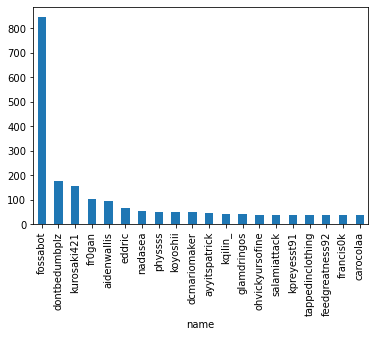

In [48]:
aoc.groupby('name').count().sort_values('_id', ascending = False)['_id'].head(20).plot.bar()

(array([6.2759e+04, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  85.4, 169.8, 254.2, 338.6, 423. , 507.4, 591.8, 676.2,
        760.6, 845. ]),
 <BarContainer object of 10 artists>)

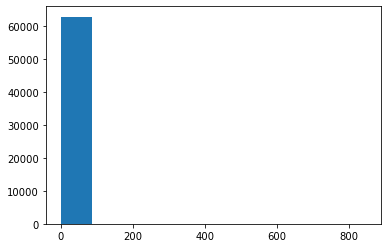

In [49]:
plt.hist(aoc.groupby('name').count().sort_values('_id', ascending = False)['_id'])

In [50]:
aoc_user_grouped = aoc.groupby('name').count().sort_values('_id', ascending = False)

Looking at how many people posted less thank 5 times during the stream.

In [51]:
len(aoc_user_grouped[aoc_user_grouped['_id'] < 5])

59461

Looking at how many emojis users post per message, because this is going to be an analysis that really requires and understanding of emojis.

In [52]:
aoc['emoji_count'] = [len(x) if type(x) == list else 0 for x in aoc['emoticons']]

In [53]:
aoc['emoji_count'].describe()

count    110821.000000
mean          0.756445
std           1.707086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          23.000000
Name: emoji_count, dtype: float64

Other interesting aspects to look at: connecting this to the video and highlighting moments.
<br>
Look at the conversation volume by minute across the whole stream.

In [54]:
aoc.keys()

Index(['_id', 'created_at', 'updated_at', 'channel_id', 'content_type',
       'content_id', 'content_offset_seconds', 'commenter', 'source', 'state',
       'message', 'more_replies', 'created_at_dt', 'updated_at_dt',
       'display_name', 'commenter_id', 'name', 'type', 'bio',
       'user-account_created_at', 'user-account_updated_at', 'logo',
       'user-account_created_at_dt', 'user-account_updated_at_dt', 'body',
       'bits_spent', 'fragments', 'is_action', 'user_badges', 'user_color',
       'user_notice_params', 'emoticons', 'emoji_count'],
      dtype='object')

In [55]:
aoc['created_at_dt'].describe()

C:\Users\dsilva2\AppData\Local\Temp/ipykernel_13628/3555186692.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  aoc['created_at_dt'].describe()


count                               110821
unique                              107296
top       2020-10-21 02:50:58.312000+00:00
freq                                     4
first     2020-10-21 00:33:27.758000+00:00
last      2020-10-21 04:04:21.725000+00:00
Name: created_at_dt, dtype: object

<AxesSubplot:>

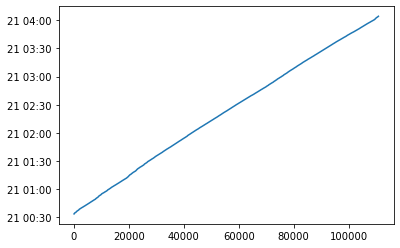

In [56]:
aoc['created_at_dt'].plot()

In [57]:
aoc['created_at_dt'][0]

Timestamp('2020-10-21 00:33:27.758000+0000', tz='tzutc()')

In [58]:
aoc['created_at_dt'][3] - aoc['created_at_dt'][0]

Timedelta('0 days 00:00:01.500000')

In [59]:
minutes_since_start = [x - aoc['created_at_dt'][0] for x in aoc['created_at_dt']]

In [ ]:
minutes_since_start

In [61]:
aoc['comment_count'] = 1

In [62]:
comments_per_min = aoc.groupby(pd.Grouper(key='created_at_dt', freq = 'T'))['comment_count'].sum().fillna(0)

In [63]:
comments_per_min

created_at_dt
2020-10-21 00:33:00+00:00    122
2020-10-21 00:34:00+00:00    462
2020-10-21 00:35:00+00:00    309
2020-10-21 00:36:00+00:00    443
2020-10-21 00:37:00+00:00    459
                            ... 
2020-10-21 04:00:00+00:00    549
2020-10-21 04:01:00+00:00    339
2020-10-21 04:02:00+00:00    377
2020-10-21 04:03:00+00:00    494
2020-10-21 04:04:00+00:00    132
Freq: T, Name: comment_count, Length: 212, dtype: int64

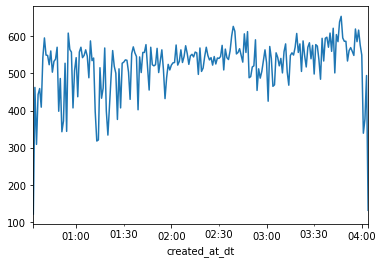

In [64]:
comments_per_min.plot(kind='line')
plt.show()

In [65]:
comments_per_min.describe()

count    212.000000
mean     522.740566
std       73.709393
min      122.000000
25%      504.750000
50%      541.000000
75%      563.250000
max      653.000000
Name: comment_count, dtype: float64

In [66]:
comments_per_min[comments_per_min >= 563]

created_at_dt
2020-10-21 00:40:00+00:00    595
2020-10-21 00:48:00+00:00    570
2020-10-21 00:55:00+00:00    608
2020-10-21 00:56:00+00:00    564
2020-10-21 01:03:00+00:00    570
2020-10-21 01:06:00+00:00    563
2020-10-21 01:09:00+00:00    587
2020-10-21 01:18:00+00:00    568
2020-10-21 01:36:00+00:00    571
2020-10-21 01:44:00+00:00    577
2020-10-21 01:47:00+00:00    570
2020-10-21 01:51:00+00:00    567
2020-10-21 01:54:00+00:00    563
2020-10-21 02:03:00+00:00    576
2020-10-21 02:06:00+00:00    563
2020-10-21 02:09:00+00:00    574
2020-10-21 02:18:00+00:00    568
2020-10-21 02:22:00+00:00    570
2020-10-21 02:32:00+00:00    575
2020-10-21 02:34:00+00:00    565
2020-10-21 02:38:00+00:00    600
2020-10-21 02:39:00+00:00    626
2020-10-21 02:40:00+00:00    613
2020-10-21 02:43:00+00:00    566
2020-10-21 02:46:00+00:00    606
2020-10-21 02:48:00+00:00    612
2020-10-21 02:53:00+00:00    590
2020-10-21 02:59:00+00:00    563
2020-10-21 03:02:00+00:00    572
2020-10-21 03:12:00+00:00    

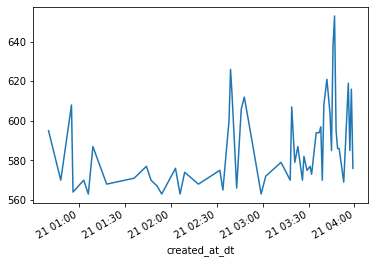

In [67]:
comments_per_min[comments_per_min >= 563].plot(kind='line')
plt.show()

In [68]:
comments_per5_min = aoc.groupby(pd.Grouper(key='created_at_dt', freq = '5T',))['comment_count'].sum().fillna(0)

In [69]:
comments_per5_min

created_at_dt
2020-10-21 00:30:00+00:00     584
2020-10-21 00:35:00+00:00    2162
2020-10-21 00:40:00+00:00    2775
2020-10-21 00:45:00+00:00    2541
2020-10-21 00:50:00+00:00    2072
2020-10-21 00:55:00+00:00    2644
2020-10-21 01:00:00+00:00    2648
2020-10-21 01:05:00+00:00    2732
2020-10-21 01:10:00+00:00    2111
2020-10-21 01:15:00+00:00    2375
2020-10-21 01:20:00+00:00    2316
2020-10-21 01:25:00+00:00    2322
2020-10-21 01:30:00+00:00    2534
2020-10-21 01:35:00+00:00    2626
2020-10-21 01:40:00+00:00    2735
2020-10-21 01:45:00+00:00    2582
2020-10-21 01:50:00+00:00    2688
2020-10-21 01:55:00+00:00    2463
2020-10-21 02:00:00+00:00    2677
2020-10-21 02:05:00+00:00    2743
2020-10-21 02:10:00+00:00    2719
2020-10-21 02:15:00+00:00    2682
2020-10-21 02:20:00+00:00    2713
2020-10-21 02:25:00+00:00    2675
2020-10-21 02:30:00+00:00    2734
2020-10-21 02:35:00+00:00    2865
2020-10-21 02:40:00+00:00    2835
2020-10-21 02:45:00+00:00    2792
2020-10-21 02:50:00+00:00    2572


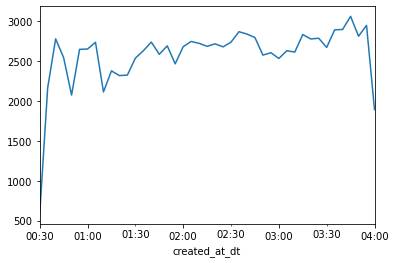

In [70]:
comments_per5_min.plot(kind='line')
plt.show()

In [71]:
comments_per5_min.describe()

count      43.000000
mean     2577.232558
std       392.832864
min       584.000000
25%      2537.500000
50%      2675.000000
75%      2774.500000
max      3057.000000
Name: comment_count, dtype: float64

In [72]:
comments_per5_min[comments_per5_min >= 2774]

created_at_dt
2020-10-21 00:40:00+00:00    2775
2020-10-21 02:35:00+00:00    2865
2020-10-21 02:40:00+00:00    2835
2020-10-21 02:45:00+00:00    2792
2020-10-21 03:15:00+00:00    2829
2020-10-21 03:20:00+00:00    2774
2020-10-21 03:25:00+00:00    2783
2020-10-21 03:35:00+00:00    2888
2020-10-21 03:40:00+00:00    2893
2020-10-21 03:45:00+00:00    3057
2020-10-21 03:50:00+00:00    2808
2020-10-21 03:55:00+00:00    2944
Name: comment_count, dtype: int64

In [73]:
comments_per_sec = aoc.groupby(pd.Grouper(key='created_at_dt', freq = 's',))['comment_count'].sum().fillna(0)

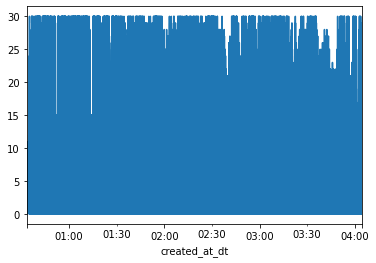

In [74]:
comments_per_sec.plot(kind='line')
plt.show()

In [75]:
comments_per_5sec = aoc.groupby(pd.Grouper(key='created_at_dt', freq = '5s',))['comment_count'].sum().fillna(0)

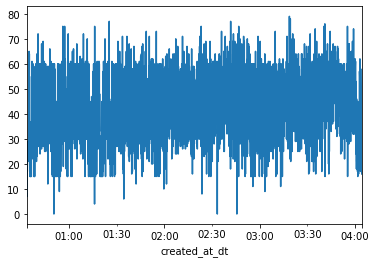

In [76]:
comments_per_5sec.plot(kind='line')
plt.show()

In [77]:
comments_per_10sec = aoc.groupby(pd.Grouper(key='created_at_dt', freq = '10s',))['comment_count'].sum().fillna(0)

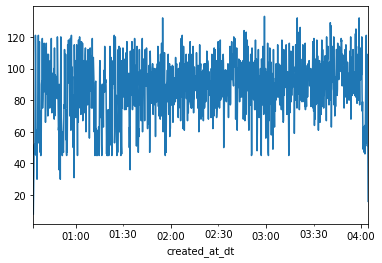

In [78]:
comments_per_10sec.plot(kind='line')
plt.show()

In [79]:
comments_per_15sec = aoc.groupby(pd.Grouper(key='created_at_dt', freq = '15s',))['comment_count'].sum().fillna(0)

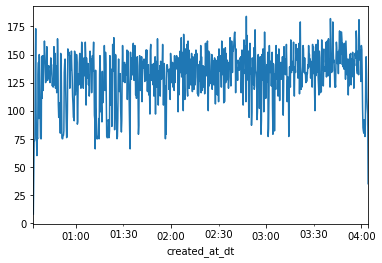

In [80]:
comments_per_15sec.plot(kind='line')
plt.show()

In [81]:
comments_per_30sec = aoc.groupby(pd.Grouper(key='created_at_dt', freq = '30s',))['comment_count'].sum().fillna(0)

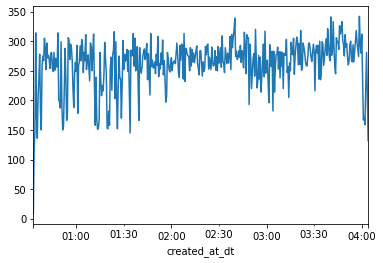

In [82]:
comments_per_30sec.plot(kind='line')
plt.show()

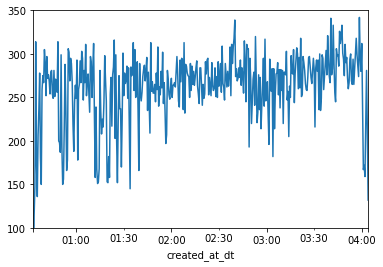

In [83]:
comments_per_30sec.plot(kind='line', ylim=(100, 350))
plt.show()

In [84]:
comments_per_30sec[comments_per_30sec > 325]

created_at_dt
2020-10-21 02:40:00+00:00    339
2020-10-21 03:40:30+00:00    341
2020-10-21 03:42:00+00:00    333
2020-10-21 03:46:00+00:00    326
2020-10-21 03:47:30+00:00    333
2020-10-21 03:58:30+00:00    342
Name: comment_count, dtype: int64